# **EDA on ExtraMarks Dataset (EMD)**

Dataset : https://drive.google.com/file/d/1Tk8RMvZr6cnwSRIBVnnsNe7z50SWbY_9/view?usp=sharing

*Key features* about the data :

1. Unlabelled Data

2. There were many columns/features in the actual dataset though we have taken only two of them, 1st being the `question text` itself and second the `syllabus id` associated with it. 

3. A rough idea on how syllabus id can be useful is , creating large buckets of questions of same subjects and then we kind of reduce our search space for near duplicates.

4. Though can't be sure if syllabus id are 100% correct or not (Human errors).

5. The question text has been preprocessed. Like removing some hyperlinks from the question, removing questions having many numerical data at this point of time.
---

###**AIM :**
`Getting familiar with the EM Dataset and exploring it a bit more deeply`.


### **Question data field**

https://drive.google.com/file/d/1qOR1WOItaBvwOhihDJ4nFnqD8sgyYwr4/view?usp=sharing

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("drive/My Drive/Extramarks Project/Dataset versions/JEE-with-answers-without-numericals.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df = df[['question_id','question','syllabus_id','answer','question_type']]
df

,question_id,question,syllabus_id,answer,question_type
0,2073346,How many π bonds are present in ferrocene,700295,a,Subjective Question
1,2073324,What is covalency of chlorine atom in second e...,698013,a,Subjective Question
2,2073225,In solid X atoms goes to corner of the cube an...,700078,No of x atoms 8 18 2 12 2,Subjective Question
3,2073215,Calculate value of x y here x and y are the to...,697895,stryde images 2022 04 11 202204110162130016496...,Subjective Question
4,2073202,In phosphorus acid if X is number of non bondi...,697895,stryde images 2022 04 11 202204119693370016496...,Subjective Question
...,...,...,...,...,...
134426,420545,A dice is rolled thrice The probability of get...,-1,frac 5 24,Single Choice Question
134427,420544,A dice is rolled thrice The probability of get...,-1,frac 5 24,Single Choice Question
134428,420543,subjective english question,-1,answer_subjective,Subjective Question
134429,415580,question subjective english,-1,answer subjective hindi,Subjective Question


In [5]:
print("Number of Questions in this pre-processed data :", df.shape[0])
print(df.shape)

Number of Questions in this pre-processed data : 134431
(134431, 5)


In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134431 entries, 0 to 134430
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   question_id    134431 non-null  int64 
 1   question       134431 non-null  object
 2   syllabus_id    134431 non-null  object
 3   answer         133850 non-null  object
 4   question_type  134431 non-null  object
dtypes: int64(1), object(4)
memory usage: 5.1+ MB


question_id        0
question           0
syllabus_id        0
answer           581
question_type      0
dtype: int64

In [7]:
df = df.dropna()   # Should have dropped single choice questions though
df.isnull().sum()

question_id      0
question         0
syllabus_id      0
answer           0
question_type    0
dtype: int64

### **Preprocessing**

In [8]:
pd.options.mode.chained_assignment = None

df['question'] = df['question'].str.lower()
df['answer'] = df['answer'].str.lower()
df['question_type'] = df['question_type'].str.lower()

df

,question_id,question,syllabus_id,answer,question_type
0,2073346,how many π bonds are present in ferrocene,700295,a,subjective question
1,2073324,what is covalency of chlorine atom in second e...,698013,a,subjective question
2,2073225,in solid x atoms goes to corner of the cube an...,700078,no of x atoms 8 18 2 12 2,subjective question
3,2073215,calculate value of x y here x and y are the to...,697895,stryde images 2022 04 11 202204110162130016496...,subjective question
4,2073202,in phosphorus acid if x is number of non bondi...,697895,stryde images 2022 04 11 202204119693370016496...,subjective question
...,...,...,...,...,...
134426,420545,a dice is rolled thrice the probability of get...,-1,frac 5 24,single choice question
134427,420544,a dice is rolled thrice the probability of get...,-1,frac 5 24,single choice question
134428,420543,subjective english question,-1,answer_subjective,subjective question
134429,415580,question subjective english,-1,answer subjective hindi,subjective question


In [9]:
# Data we're working with currently

df['question_type'].value_counts()

single choice question      89115
subjective question         43896
multiple choice question      656
integer question              183
Name: question_type, dtype: int64

In [10]:
single_choice_ques_df = df[df['question_type'] == 'single choice question']
subjective_ques_df = df[df['question_type'] == 'subjective_question']
multiple_choice_ques_df = df[df['question_type'] == 'multiple choice question']
integer_question = df[df['question_type'] == 'integer question']

In [11]:
print("Number of Questions in this pre-processed data :", df.shape[0])
print(df.shape)

Number of Questions in this pre-processed data : 133850
(133850, 5)


In [12]:
df.duplicated().sum()

0

##### **FEATURE ENGINEERING ON THE DATASET**

- Character length of a question
- Number of words in a question

In [13]:
# Character length of a question

df["len"] = df["question"].str.len()-1

In [14]:
# Number of words
df["words"] = df["question"].str.strip().str.split().str.len()

In [15]:
# Number of common words

def to_lower(d):
  a = [[x.lower() for x in s] for s in d]
  return a 

def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1|w2))

Minimum characters 1
Maximum characters 4919
Average number of characters 84


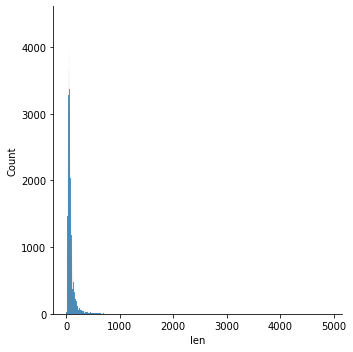

In [16]:
# Question lengths statistics

sns.displot(df['len'])
print('Minimum characters',df['len'].min())
print('Maximum characters',df['len'].max())
print('Average number of characters',int(df['len'].mean()))

In [17]:
df

,question_id,question,syllabus_id,answer,question_type,len,words
0,2073346,how many π bonds are present in ferrocene,700295,a,subjective question,41,8
1,2073324,what is covalency of chlorine atom in second e...,698013,a,subjective question,58,10
2,2073225,in solid x atoms goes to corner of the cube an...,700078,no of x atoms 8 18 2 12 2,subjective question,126,25
3,2073215,calculate value of x y here x and y are the to...,697895,stryde images 2022 04 11 202204110162130016496...,subjective question,156,28
4,2073202,in phosphorus acid if x is number of non bondi...,697895,stryde images 2022 04 11 202204119693370016496...,subjective question,143,32
...,...,...,...,...,...,...,...
134426,420545,a dice is rolled thrice the probability of get...,-1,frac 5 24,single choice question,114,21
134427,420544,a dice is rolled thrice the probability of get...,-1,frac 5 24,single choice question,114,21
134428,420543,subjective english question,-1,answer_subjective,subjective question,27,3
134429,415580,question subjective english,-1,answer subjective hindi,subjective question,27,3


In [18]:
# Questions with len = 1,2,3 Are they of any use ?

#  df.loc[df['len'] == 3]

# No questions of length 1 and 2 seems senseful so removing them

df = df.drop(df[df['len'] <= 2].index)

df.loc[df['len'] <= 3]


,question_id,question,syllabus_id,answer,question_type,len,words
20795,1606350,she,511225,had taken a formal training before joining the...,single choice question,3,1
22432,1456491,she,511224,is trying hard to excel,single choice question,3,1
48052,1808367,knk,-1,bbjb,subjective question,3,1
59596,1747934,gnp,667999,gdp plus net factor income from abroad,single choice question,3,1
73576,1433929,how,509609,dare you enter my room without knocking at the...,single choice question,3,1
73582,1433621,you,509609,ought to apply in the form provided with the p...,single choice question,3,1
73591,1433612,she,509609,couldn't study yesterday because of the noise ...,single choice question,3,1
73593,1434533,how,509609,dare you call me a liar,single choice question,3,1
73594,1434324,you,509609,need not smoke in a non smoking area,single choice question,3,1
123212,498479,ram,4407,has been serving the indian army since 1990,single choice question,3,1


Minimum words 1
Maximum words 1017
Average num of words 15


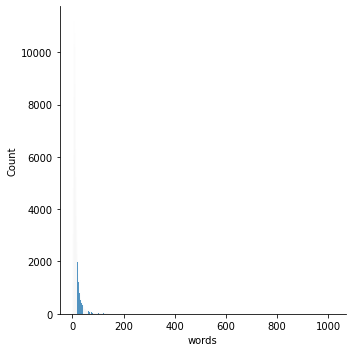

In [19]:
sns.displot(df['words'])
print('Minimum words',df['words'].min())
print('Maximum words',df['words'].max())
print('Average num of words',int(df['words'].mean()))

In [20]:
# Questions with words = 1,2,3 Are they of any use, seems useful ? yes some seems useful

df.loc[df['words'] <= 2]

,question_id,question,syllabus_id,answer,question_type,len,words
144,2072214,biosphere is,697984,in which individual interact to each other,single choice question,12,2
664,2072040,verdigris is,700295,basic copper acetate,single choice question,12,2
1091,2060711,associated colloids,700206,lower the surface tension and raise the viscos...,single choice question,19,2
1166,2060561,peptization involves,700206,disintegration of colloidal aggregates,single choice question,20,2
1183,2060514,all colloids,700206,are two phase systems,single choice question,12,2
...,...,...,...,...,...,...,...
134417,412759,subjective englishkajhsdklf,-1,subjective hindiasdfasdf,subjective question,27,2
134419,412507,subjective englishkajhsdklf,-1,subjective hindiasdfasdf,subjective question,27,2
134421,412240,kjkj,-1,dfdkfkdjfjd,single choice question,4,1
134422,412239,subjective englishkajhsdklf,-1,subjective hindiasdfasdf,subjective question,27,2


In [21]:
from collections import OrderedDict
import operator
import nltk
from nltk import bigrams, trigrams, word_tokenize
from collections import Counter, defaultdict
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
from re import search

ques = df['question'].tolist()

ans = df['answer'].tolist()
types = df['question_type'].tolist()

appended = []

for i in range(len(ques)):
    ques[i] = ques[i].lower()
    ans[i] = str(ans[i]).lower()
    types[i] = types[i].lower()

def A(sent) :
  return (search("following",sent) or search("select",sent) or search("choose",sent))!=None

def B(sent) :
  return (search("statement",sent) or search("option",sent) or search("compound",sent) or search("match",sent) or search("order",sent)) != None

def C(sent) :

  options = ["correct" ,"incorrect", "true", "false", "wrong", "least", "most"]

  for i in options :
    if(search(i,sent)):
      return 1 
  return 0

def D(qtype) :
  return qtype == "single choice question" or qtype == "multiple choice question" 

def E(sent) :
  if (search("which of the following",sent)):
    return 1
  return 0

def need_to_append_answer(sent,qtype) :
  return (((A(sent) + B(sent) + C(sent) >= 2) and D(qtype)) or E(sent))

for i in range(len(ques)):
    if(need_to_append_answer(ques[i],types[i])):
      ques[i] = ques[i]+" "+ans[i] 
      appended.append(1)
    else:
      appended.append(0)

# ques = list(set(ques))

# sz = 10000
# ques

len(ques)

133823

In [24]:
unigrams = []

for sent in ques :
  unigrams.append(set(nltk.word_tokenize(sent)))

# unigrams

In [25]:
req_pairs = []
threshold = 0.7

sz = 40000

for i in range(0,sz-1):

  s1 = unigrams[i]

  if((i % 1000) == 0):
    print(i) 
  
  for j in range(i+1,sz):

    s2 = unigrams[j]

    union = len(s1|s2)
    common = len(s1&s2)

    jaccard_sim =  common/union

    if(jaccard_sim >= threshold):
      req_pairs.append([ques[i],ques[j],ans[i],ans[j],types[i],types[j],jaccard_sim,appended[i]])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000


In [26]:
req_pairs

[['how many π bonds are present in ferrocene ',
  'how many π are present in ferrocene ',
  'a ',
  'a ',
  'subjective question',
  'subjective question',
  0.875,
  0],
 ['how many π bonds are present in ferrocene ',
  'how many π bonds are present in silicon dioxide ',
  'a ',
  'integer_type_answer ',
  'subjective question',
  'integer question',
  0.7,
  0],
 ['what is covalency of chlorine atom in second excited state ',
  'what is covalency of chlorine atom in second excited state ',
  'a ',
  'a ',
  'subjective question',
  'subjective question',
  1.0,
  0],
 ['calculate value of x y here x and y are the total number of bonds in benzene and benzyne respectively which are formed by overlapping of hybridized orbitals ',
  'calculate value of x y here x and y are the total number of bonds in benzene and benzene respectively which are formed by overlapping of hybridized orbitals ',
  'stryde images 2022 04 11 20220411016213001649675720 png ',
  '1 stryde images 2022 04 11 202204

In [27]:
duplicate_pairs = pd.DataFrame(req_pairs)

In [28]:
duplicate_pairs

,0,1,2,3,4,5,6,7
0,how many π bonds are present in ferrocene,how many π are present in ferrocene,a,a,subjective question,subjective question,0.875000,0
1,how many π bonds are present in ferrocene,how many π bonds are present in silicon dioxide,a,integer_type_answer,subjective question,integer question,0.700000,0
2,what is covalency of chlorine atom in second e...,what is covalency of chlorine atom in second e...,a,a,subjective question,subjective question,1.000000,0
3,calculate value of x y here x and y are the to...,calculate value of x y here x and y are the to...,stryde images 2022 04 11 202204110162130016496...,1 stryde images 2022 04 11 2022041177446500164...,subjective question,subjective question,0.954545,0
4,in phosphorus acid if x is number of non bondi...,in phosphorus acid if x is number of non bondi...,stryde images 2022 04 11 202204119693370016496...,stryde images 2022 04 11 202204110011760016496...,subjective question,subjective question,1.000000,0
...,...,...,...,...,...,...,...,...
48204,write four rhyming words with ine sound,write four rhyming words with at sound,answers may vary fine shine pine mine,answers may vary bat cat flat mat,subjective question,subjective question,0.750000,0
48205,write two sentences with will and will not each,write two sentences with can and cannot each,answers may vary 1 i will go to school tomorro...,answers may vary 1 i _can_ speak english 2 he ...,subjective question,subjective question,0.777778,0
48206,select the odd one out,select the odd one out,wheat,rice,single choice question,single choice question,1.000000,0
48207,select the vegetable among the following eatab...,select the fruit among the following eatables,brinjal,papaya,single choice question,single choice question,0.714286,0


In [29]:
duplicate_pairs.to_csv('drive/MyDrive/Extramarks Project/Week4/File2.csv')

In [ ]:
df[df['question'].str.lower() == 'which of the following is an example of a viral disease ']

,question_id,question,syllabus_id,answer,question_type,len,words
49930,1793289,Which of the following is an example of a vira...,672638,Influenza,Single Choice Question,55,11


In [ ]:
df[df['question'].str.lower() == 'which of the following is an example of a viral disease ']

### **Word share / Jaccard Similarity Plot**

In [ ]:
sns.distplot(df[df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

## **Some data eyeballing to the cases where `word share is high` but still they are `not duplicates`.**

- **Note** : `Word_share = Jaccard Similarity (JC)`

- Number of shared terms over the number of all unique terms in both strings 





In [ ]:
vis_df = df.loc[(df['word_share'] == 1) & (df['is_duplicate']==0)]
vis_df[['question1','question2','word_share','is_duplicate']]

⚡ Though questions have `Exact same (JC = 1)` vocabulary but `ordering` changes the meaning completely. This is where sementic nature is required to identify duplicates better.  

> Example : 
> - a) What kind of Asian guys do White girls like ?
> - b) What kind of Asian girls do White guys like ?

> Though some labels I feel are not appropriate and they should be duplicate indeed.
> - a) Which laptop I should buy ?
> - b) Which laptop should I buy ?

In [ ]:
vis_df = df.loc[(df['word_share'] >= 0.9) & (df['is_duplicate']==0)]
vis_df[['question1','question2','word_share','is_duplicate']]

# Use inetractive table and sort acc to word_share values to see 0.9 word_share values first

⚡ Though questions have `High word_share(JC)` vocabulary but a change of `Keyword` in the question changes it meaning.  

> Example : Negation sentences 
> - a) Who are the best science reporters not writing in English ?
> - b) Who are the best science reporters writing in English ?

> Example : Key noun is different 
> - a) How does a typical day in IIM C pass by ?
> - b) How does a typical day in IIM A pass by ?

> Example : More specification gets added
> - a) How much does it cost to study in Canada ?
> - b) How much does it cost to study medicine in Canada ?

In [ ]:
# Some more cases where data is lexically similar but not duplicates

vis_df = df.loc[(df['word_share'] >= 0.75) & (df['is_duplicate']==0)]
vis_df[['question1','question2','word_share','is_duplicate']]

⚡ Though questions have `Moderately high word_share(JC)` but a change of `Keyword` in the question changes it meaning.  

- **Observation** - In this chart we see short sentences whereas earlier there were long sentences, that's because changing a single word in small sentences drops down the Jaccard similarity more (Obvious though).

In [ ]:
# More non-duplicate pairs visualization

threshold = 0.4
df.loc[(df['word_share'] >= threshold)][:200]


## **Some data eyeballing to the cases where `word share is low` but still they are `duplicates`.**

In [ ]:
vis_df = df.loc[(df['word_share'] <= 0.8) & (df['is_duplicate']==1)]
vis_df[['question1','question2','word_share','is_duplicate']][:1000]

What inference can we make from above ?

In [ ]:
# def Unigram_distance(dataset):

#   model = defaultdict(lambda : 0)
#   total_count = 0 
#   for sentence in dataset:
#     sentence = nltk.word_tokenize(sentence)
#     for w1 in sentence:
#       model[w1] += 1
#       total_count += 1 ;

#   for w1 in model:
#       model[w1] /= total_count
  
#   return model

In [ ]:
profile = ProfileReport(df, title="Quora", html={'style':{'full_width':True}})

In [ ]:
profile.to_notebook_iframe()

In [ ]:
# Preprocessing - ? se pehle space daaldo or remove it

In [ ]:
drive.flush_and_unmount()